# Appendix E Sampling Distribution 

### E.2.2 Permutation 

In hypothesis testing, the test statistic is compared to the *null distribution*, that is the *sampling distribution under the null hypothesis*. Sometimes the null hypothesis is specific enough that we can approximate the true distribution using the observed samples. 

Suppose that we observe $n$ i.i.d. samples $\{ (x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)\}$ from an unknown true population. For instance, we can imagine that $x$ is the face of a coin (Head, Tail) and $y$ is the age of the tosser. We are interested in the following hypothesis
\[
H_0: \mathbb{E}[y \mid x =T] = \mathbb{E}[y \mid x =H] \ \ \ \ \ \ \ \ \ \ {\rm v.s.}\ \ \ \ \ \ \ \ \ \ H_1: \mathbb{E}[y \mid x =T] \neq  \mathbb{E}[y \mid x =H].
\]
Under the null, we know that the expectation of $y$ remains the same regardless of the value of $x$. This means that the the expectation of $y$ should remain the same if we shuffle $x$, e.g., by creating a new data set as 
\[
\{ (x_6,y_1), (x_{17},y_2), \ldots, (x_3,y_n)\},
\]
where the indices of $x$s are *permuted*. From the permuted data set, we can estimate the mean difference between two groups defined by the new $x$.  

In [2]:
set.seed(1)
n=50;
x=rbinom(n=50,size=1,prob=0.5);
mu.diff=0;
error.terms=rnorm(n)*2;
y=x*mu.diff+error.terms;

(diff=mean(y[x==1])-mean(y[x==0]))

[1] -0.2070484

In [5]:
x.perm=sample(x,size=length(x),replace=FALSE)
(mean.diff=mean(y[x.perm==1])-mean(y[x.perm==0]))

[1] 0.2475659

In [6]:
permutation.diff<-function(x,y){
    x.perm=sample(x,size=length(x),replace=FALSE)
  mean.diff=mean(y[x.perm==1])-mean(y[x.perm==0])
    return(mean.diff)
}

In [19]:
set.seed(1)
n=50;
x=rbinom(n=50,size=1,prob=0.5);
mu.diff=1;
error.terms=rnorm(n);
y=x*mu.diff+error.terms;

(diff=mean(y[x==1])-mean(y[x==0]))

P=1e4;
mean.diff.perm=replicate(P,permutation.diff(x=x,y=y))

[1] 0.8964758

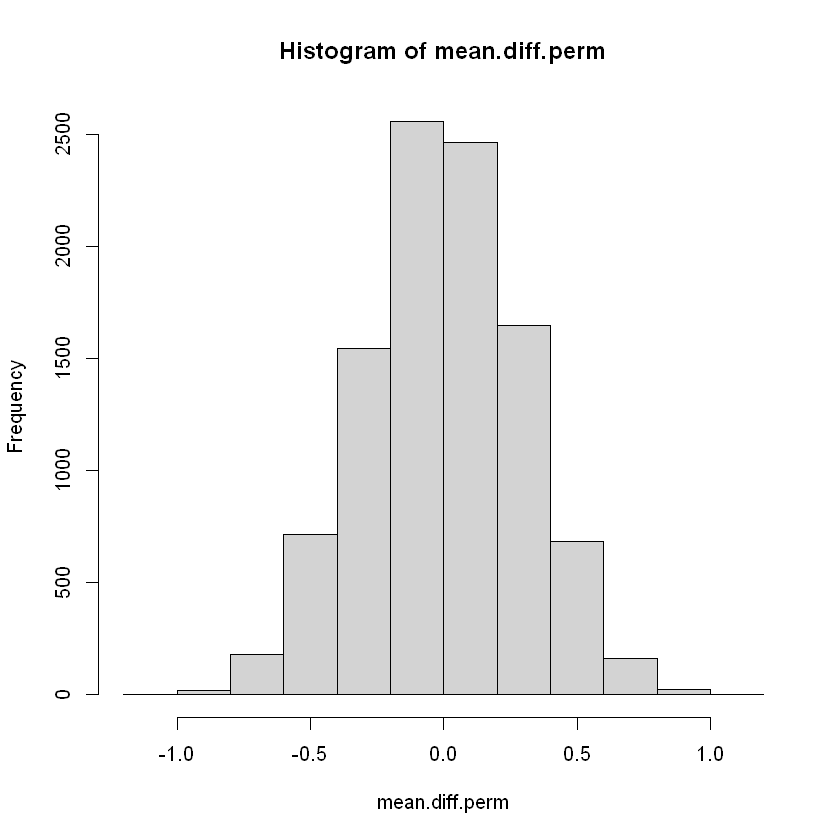

In [20]:
hist(mean.diff.perm)

In [21]:
mean( abs(diff) < abs(mean.diff.perm) )

[1] 0.0013